# Optical flow

Optical flow stands as a cornerstone concept in the field of computer vision, offering a profound insight into the dynamics of moving objects in visual scenes. Essentially, it represents the pattern of apparent motion of objects, surfaces, and edges in a visual scene caused by the relative motion between an observer and the scene.

## What is Optical Flow?

Optical flow refers to the distribution of apparent velocities of movement of brightness patterns in an image. It is crucial in numerous applications such as motion detection, object tracking, and video compression. The main idea is to calculate the motion between two consecutive frames of a video at pixel level.

## How Optical Flow Works

The calculation of optical flow involves estimating the motion vector of each pixel in a frame, which shows where that pixel is likely to move in the next frame. The Lucas-Kanade method, which assumes that the flow is essentially constant in a local neighbourhood of the pixel under consideration, is the main algorithm employed to estimate optical flow.

> Lucas, B.D., & Kanade, T. (1981). An iterative image registration technique with an application to stereo vision. Proceedings of Imaging Understanding Workshop, 121-130.

## Applications of Optical Flow

Optical flow finds its applications in:
1. Motion Analysis and Object Tracking: In video surveillance or sports analysis, tracking the movement of objects or individuals.
2. Robotics and Autonomous Driving: Assisting in navigation and obstacle avoidance by understanding the movement in the surrounding environment.
3. Video Encoding and Compression: Estimating motion for predictive encoding of video frames.

## Advantages and Challenges

Optical flow provides an effective means of understanding and quantifying motion in videos. However, the accuracy of optical flow depends heavily on the quality of input video and the presence of noise. It also requires high computational power for real-time applications.





## Imports

In [1]:
!pip install opencv-python numpy matplotlib

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Obtain image samples

These images have been obtained from the [NTU RGB+D dataset](https://rose1.ntu.edu.sg/dataset/actionR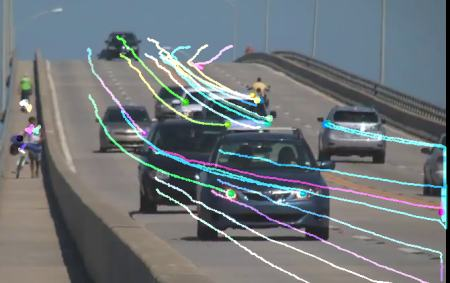

In [3]:
!wget 'https://github.com/FranciscoFlorezRevuelta/HAR/raw/main/samples/S001C001P001R001A055_rgb.avi' -O example1.avi
!wget 'https://github.com/FranciscoFlorezRevuelta/HAR/raw/main/samples/S001C001P001R002A015_rgb.avi' -O example2.avi
!wget 'https://github.com/FranciscoFlorezRevuelta/HAR/raw/main/samples/S001C002P006R001A050_rgb.avi' -O example3.avi
!wget 'https://github.com/FranciscoFlorezRevuelta/HAR/raw/main/samples/S001C002P006R001A051_rgb.avi' -O example4.avi
!wget 'https://github.com/FranciscoFlorezRevuelta/HAR/raw/main/samples/S001C002P006R001A052_rgb.avi' -O example5.avi
!wget 'https://github.com/FranciscoFlorezRevuelta/HAR/raw/main/samples/S001C002P007R002A048_rgb.avi' -O example6.avi

--2024-03-17 16:41:32--  https://github.com/FranciscoFlorezRevuelta/HAR/raw/main/samples/S001C001P001R001A055_rgb.avi
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/FranciscoFlorezRevuelta/HAR/main/samples/S001C001P001R001A055_rgb.avi [following]
--2024-03-17 16:41:32--  https://raw.githubusercontent.com/FranciscoFlorezRevuelta/HAR/main/samples/S001C001P001R001A055_rgb.avi
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2128786 (2.0M) [video/msvideo]
Saving to: ‘example1.avi’

example1.avi        100%[===================>]   2.03M  --.-KB/s    in 0.09s   

2024-03-17 16:41:33 (22.3 MB/s) - ‘exa

## Read the video

You can change the name of the video to example{1-6}.avi

In [4]:
# Load your video
video_path = '/content/example1.avi'
cap = cv2.VideoCapture(video_path)

## Obtain optical flow for each video frame

[Lucas-Kanade method](https://docs.opencv.org/4.x/opticalflow_lk.jpg) computes optical flow for a sparse feature set (for instance, corners detected using Shi-Tomasi algorithm).

OpenCV provides another algorithm to find the dense optical flow. It computes the optical flow for all the points in the frame. It is based on Gunnar Farneback's algorithm.

> Farnebäck, G. (2003). Two-frame motion estimation based on polynomial expansion. In Image Analysis: 13th Scandinavian Conference, SCIA 2003 Halmstad, Sweden, June 29–July 2, 2003 Proceedings 13 (pp. 363-370). Springer Berlin Heidelberg.

In [5]:

# ret = a boolean return value from getting the frame, first_frame = the first frame in the entire video sequence
ret, first_frame = cap.read()

# Converts frame to grayscale because we only need the luminance channel for detecting edges - less computationally expensive
prev_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)

# Creates an image filled with zero # intensities with the same dimensions as the frame
mask = np.zeros_like(first_frame)

# Sets image saturation to maximum
mask[..., 1] = 255

while(cap.isOpened()):

    # ret = a boolean return value from getting the frame, frame = the current frame being projected in the video
    ret, frame = cap.read()

    if not ret:
        break

    # Converts each frame to grayscale - we previously only converted the first frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Calculates dense optical flow by Farneback method
    flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)

    # Computes the magnitude and angle of the 2D vectors
    magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])

    # Sets image hue according to the optical flow direction
    mask[..., 0] = angle * 180 / np.pi / 2

    # Sets image value according to the optical flow magnitude (normalized)
    mask[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)

    # Converts HSV to RGB (BGR) color representation
    rgb = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR)

    # Opens a new window and displays the output frame
    plt.imshow(rgb)
    plt.show()

    # Updates previous frame
    prev_gray = gray

# The following frees up resources and closes all windows
cap.release()



Output hidden; open in https://colab.research.google.com to view.